# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [22]:
"""
!pip install pandas
!pip install requests
!pip install googlemaps
!pip install folium
!pip install ticketpy
!pip install time
!pip install datetime
"""

'\n!pip install pandas\n!pip install requests\n!pip install googlemaps\n!pip install folium\n!pip install ticketpy\n!pip install time\n!pip install datetime\n'

In [23]:
import pandas as pd
import requests
import googlemaps
import time
from datetime import datetime, timedelta
import ticketpy
import folium
import googlemaps
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [24]:
# WEATHER API

forecast_url = "http://api.openweathermap.org/data/2.5/forecast"
api_key = "" 

# We do that step later

## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

In [25]:
## 1. TICKETMASTER API

tm_client = ticketpy.ApiClient('') #Ticketmaster API key

#Format YYYY-MM-DD
start_date = "2024-10-23"
end_date = "2024-10-30"

pages = tm_client.events.find(
    country_code = 'DE',
    classification_name = 'music',
    start_date_time=f'{start_date}T12:00:00Z',
    end_date_time=f'{end_date}T12:00:00Z'
).all()

In [26]:
# 2. GOOGLE MAPS API
api_key_google = ""  # Replace with your actual Google API key
gmaps = googlemaps.Client(key=api_key_google)

def find_nearest_commercial_airport(lat, lon):
    places_result = gmaps.places_nearby(location=(lat, lon), radius=50000, type='airport', keyword='commercial')
    if places_result['results']:
        airport = places_result['results'][0]
        return airport['name'], airport['geometry']['location']['lat'], airport['geometry']['location']['lng']
    return None, None, None

find_nearest_commercial_airport(48.1947,11.60784) #Example Usage API outside of Website

('Munich International Airport', 48.3539867, 11.7883625)

In [27]:
# 3. OPEN STREET MAP -> accesed via Flask App

## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

In [28]:
# Create List of Dictionaries of API data
event_data = [] #initilalyze event data with empty list 

# Loop through the events in the pages
for event in pages:
    # Access the venue object (assuming there's at least one venue)
    venue = event.venues[0]
    
    genre = None
    if event.classifications:
        classification = event.classifications[0]  # Access the first classification object

        # Check if the classification has a 'genre' attribute and extract it
        if hasattr(classification, 'genre') and classification.genre:
            genre = classification.genre.name 
    # Create a dictionary for the current event
    event_dict = {
        'Event Name': event.name,
        'Event Date': event.utc_datetime,
        'Venue Name': venue.name,
        'Venue Address': venue.address,
        'Venue Postalcode': venue.postal_code,
        'Venue Latitude': venue.latitude,
        'Venue Longitude': venue.longitude,
        'Venue City': venue.city,
        'Box Office': venue.dmas,
        'Event Genre': genre
    }
    
    # Add the event dictionary to the list
    event_data.append(event_dict)


venue_list = [item['Venue Address'] for item in event_data]

In [29]:
# Check data structure
for event in pages:
    print(f"Event: {event.name}")
    print(event.utc_datetime)
    # Access the venue object
    venue = event.venues[0]

    print(venue.address)
    print(venue.latitude)
    print(venue.longitude)

Event: Human Musical Group Sensations GLASS ANIMALS: TOUR OF EARTH
2024-10-24 17:30:00
Lilienthalallee 29
48.1947
11.60784
Event: Forest Claudette
2024-10-24 18:00:00
Schönhauser Allee 36
52.53839
13.41299
Event: BenjRose - Germany 2024
2024-10-24 18:00:00
Bartholomäus-Schink-Straße 65/67
50.95178
6.91641
Event: Omar Rudberg
2024-10-25 17:00:00
Bartholomäus-Schink-Straße 65/67
50.95181
6.91637
Event: Opera Passion
2024-10-25 17:30:00
Spandauer Damm 22-24
52.51993
13.29265
Event: Brit Floyd
2024-10-25 18:00:00
Johannes-Brahms-Platz
53.55538
9.98061
Event: BLK ODYSSY – The Fantasy House Tour
2024-10-25 18:00:00
Hermannstraße 146
52.46438
13.43338
Event: MARCUS KING: MOOD SWINGS THE WORLD TOUR
2024-10-25 18:00:00
Siegburger Straße 110
50.92479
6.97832
Event: Monster Florence
2024-10-26 18:00:00
Am Wriezener Bahnhof
52.51098
13.44159
Event: Ellen Andrea Wang Trio
2024-10-26 18:00:00
Bahnhofstraße 82
52.84425
8.05587
Event: Jamie Webster
2024-10-26 18:00:00
Grindelallee 5
53.56455
9.98366
E

In [30]:
df_all = pd.DataFrame()

venue_events = {}

for event in event_data:
    venue_lat = event['Venue Latitude']
    venue_lon = event['Venue Longitude']
    venue_key = (venue_lat, venue_lon)  # Use a tuple as the key for the venue
    
    # If the venue_key is not in the dictionary, initialize it with an empty list
    if venue_key not in venue_events:
        venue_events[venue_key] = []
    
    # Append the event details to the list for this venue
    venue_events[venue_key].append(event)

for venue, events in venue_events.items():
    venue_lat, venue_lon = venue

    df_new = pd.DataFrame(events)
    df_all = pd.concat([df_all, df_new], ignore_index=True)

df_all = df_all.drop(columns=['Venue Name', 'Box Office'])



df_clean_ticketmaster = df_all.dropna()
df_clean_ticketmaster = df_clean_ticketmaster[(df_clean_ticketmaster['Venue Latitude'] != 0) & (df_clean_ticketmaster['Venue Longitude'] != 0)]

type(df_clean_ticketmaster['Venue Latitude'][0])

df_clean_ticketmaster = df_clean_ticketmaster[(df_clean_ticketmaster['Venue Latitude'] != "0") & (df_clean_ticketmaster['Venue Longitude'] != "0")]
df_sorted_tmaster = df_clean_ticketmaster.sort_values(by='Event Date', ascending = True, ignore_index=True)
df_sorted_tmaster = df_sorted_tmaster.drop_duplicates(subset=['Event Date', 'Venue Address'], keep='first', ignore_index=True)

 
df_sorted_tmaster.head()



,Event Name,Event Date,Venue Address,Venue Postalcode,Venue Latitude,Venue Longitude,Venue City,Event Genre
0,Human Musical Group Sensations GLASS ANIMALS: ...,2024-10-24 17:30:00,Lilienthalallee 29,80939,48.1947,11.60784,Munich,Rock
1,Forest Claudette,2024-10-24 18:00:00,Schönhauser Allee 36,10435,52.53839,13.41299,Berlin,Hip-Hop/Rap
2,BenjRose - Germany 2024,2024-10-24 18:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95178,6.91641,Cologne,Rock
3,Omar Rudberg,2024-10-25 17:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95181,6.91637,Cologne,Pop
4,Opera Passion,2024-10-25 17:30:00,Spandauer Damm 22-24,14059,52.51993,13.29265,Berlin,Classical


In [31]:
cities_planned = df_clean_ticketmaster['Venue City'].unique()
cities_planned = cities_planned.tolist()
print(cities_planned)

['Munich', 'Berlin', 'Cologne', 'Hamburg', 'Cloppenburg', 'Frankfurt am Main', 'Düsseldorf']


In [32]:
# Function to fetch the weather forecast from OpenWeatherMap
def get_weather_forecast(lat, lon, event_date, api_key):
    # Call OpenWeatherMap API to get the forecast
    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key,
        'units': 'metric'
    }
    
    response = requests.get(forecast_url, params=params).json()

    # Check if the API returned the forecast list
    if 'list' not in response:
        return None

    # Iterate through forecast data to find the closest forecast to the event date/time
    for forecast in response['list']:
        forecast_time = datetime.strptime(forecast['dt_txt'], "%Y-%m-%d %H:%M:%S")

        # Find the closest forecast to the event date
        if abs((forecast_time - event_date).total_seconds()) < 3 * 3600:  # +/- 3 hours
            weather_description = forecast['weather'][0]['description']
            temp = forecast['main']['temp']
            return f"{temp}°C, {weather_description}"
    
    return None

# Add a new 'Weather Forecast' column
df_sorted_tmaster['Weather Forecast'] = None

# Current date/time
current_date = datetime.now()

# Loop through each event in the DataFrame
for index, row in df_sorted_tmaster.iterrows():
    event_date = row['Event Date']
    
    # Check if the event date is within the next 5 days
    if 0 <= (event_date - current_date).days <= 5:
        lat = row['Venue Latitude']
        lon = row['Venue Longitude']

        # Get the weather forecast for the event
        forecast = get_weather_forecast(lat, lon, event_date, api_key)

        # Update the DataFrame with the forecast
        df_sorted_tmaster.at[index, 'Weather Forecast'] = forecast
    else:
        df_sorted_tmaster.at[index, 'Weather Forecast'] = "No forecast available"


In [33]:
#Add new columns in order 
df_weather = df_sorted_tmaster.copy(deep=True)
df_weather[['Temp_Celsius', 'Forecast Details']] = df_weather['Weather Forecast'].str.split(', ', expand=True)
df_weather = df_weather.dropna()
df_weather['Temp_Celsius'] = df_weather['Temp_Celsius'].apply(lambda x: float(x.replace("°C", "")))
df_weather = df_weather.drop(columns=['Weather Forecast'])
df_weather


,Event Name,Event Date,Venue Address,Venue Postalcode,Venue Latitude,Venue Longitude,Venue City,Event Genre,Temp_Celsius,Forecast Details
0,Human Musical Group Sensations GLASS ANIMALS: ...,2024-10-24 17:30:00,Lilienthalallee 29,80939,48.1947,11.60784,Munich,Rock,13.97,overcast clouds
1,Forest Claudette,2024-10-24 18:00:00,Schönhauser Allee 36,10435,52.53839,13.41299,Berlin,Hip-Hop/Rap,12.77,clear sky
2,BenjRose - Germany 2024,2024-10-24 18:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95178,6.91641,Cologne,Rock,13.27,scattered clouds
3,Omar Rudberg,2024-10-25 17:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95181,6.91637,Cologne,Pop,19.41,clear sky
4,Opera Passion,2024-10-25 17:30:00,Spandauer Damm 22-24,14059,52.51993,13.29265,Berlin,Classical,17.15,clear sky
5,Brit Floyd,2024-10-25 18:00:00,Johannes-Brahms-Platz,20355,53.55538,9.98061,Hamburg,Rock,12.12,clear sky
6,BLK ODYSSY – The Fantasy House Tour,2024-10-25 18:00:00,Hermannstraße 146,12051,52.46438,13.43338,Berlin,Hip-Hop/Rap,14.39,clear sky
7,MARCUS KING: MOOD SWINGS THE WORLD TOUR,2024-10-25 18:00:00,Siegburger Straße 110,50679,50.92479,6.97832,Cologne,Rock,15.45,scattered clouds
8,Jamie Webster,2024-10-26 18:00:00,Grindelallee 5,20146,53.56455,9.98366,Hamburg,Rock,13.26,few clouds
9,Ellen Andrea Wang Trio,2024-10-26 18:00:00,Bahnhofstraße 82,49661,52.84425,8.05587,Cloppenburg,Blues,13.74,broken clouds


In [34]:
germany_map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)  # Zoom level for Germany

#Loop through the filtered DataFrame and add markers
for _, row in df_sorted_tmaster.iterrows():
    # Extract relevant details from each row
    venue_lat = row['Venue Latitude']
    venue_lon = row['Venue Longitude']
    event_name = row['Event Name']
    event_date = row['Event Date']
    event_temp = row['Weather Forecast']
    
    # Create a popup with event information (name and date)
    popup_content = f"{event_name} at {event_date}, Weather will be {event_temp}."

    #Add the marker to the map
    folium.Marker(
        location=[venue_lat, venue_lon],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip=event_name
    ).add_to(germany_map)

germany_map.save("germany_events_map.html")

In [35]:
def find_nearest_commercial_airport(lat, lon):
    """Find the nearest commercial airport."""
    places_result = gmaps.places_nearby(
        location=(lat, lon),
        radius=50000,  # 50 km search radius
        type='airport',
        keyword='commercial'  # Filter for commercial airports
    )
    if places_result['results']:
        airport = places_result['results'][0]
        airport_name = airport['name']
        airport_lat = airport['geometry']['location']['lat']
        airport_lon = airport['geometry']['location']['lng']
        return airport_name, airport_lat, airport_lon
    else:
        return None, None, None

def find_best_reviewed_place(lat, lon, place_type):
    """Find the closest and best-reviewed restaurant or hotel."""
    places_result = gmaps.places_nearby(
        location=(lat, lon),
        radius=2000,  # Search within 2 km radius
        type=place_type,
        rank_by='prominence'  # Rank by relevance and reviews
    )
    best_place = None
    highest_rating = -1
    
    # Loop through results to find the highest-rated place
    for place in places_result.get('results', []):
        rating = place.get('rating', 0)
        if rating > highest_rating:
            highest_rating = rating
            best_place = place
    
    if best_place:
        place_name = best_place['name']
        place_lat = best_place['geometry']['location']['lat']
        place_lon = best_place['geometry']['location']['lng']
        place_rating = best_place['rating']
        return place_name, place_lat, place_lon, place_rating
    else:
        return None, None, None, None

def calculate_distance_matrix(origins, destinations, mode='driving', departure_time=None):
    """Calculate distance and time using the Google Maps Distance Matrix API."""
    distance_matrix = gmaps.distance_matrix(
        origins, 
        destinations, 
        mode=mode, 
        departure_time=departure_time  # Incorporate departure time
    )
    if distance_matrix['rows'][0]['elements'][0]['status'] == 'OK':
        distance_km = distance_matrix['rows'][0]['elements'][0]['distance']['value'] / 1000  # in kilometers
        duration_minutes = distance_matrix['rows'][0]['elements'][0]['duration']['value'] / 60  # in minutes
        return distance_km, duration_minutes
    else:
        return None, None

def process_single_venue(row):
    """Process a single venue to find the best restaurant, hotel, and airport details."""
    venue_lat = row['Venue Latitude']
    venue_lon = row['Venue Longitude']

    # Convert the event date to a datetime object
    event_date = pd.to_datetime(row['Event Date'])

    # Subtract 2 hours from the event date
    event_date_minus_2_hours = event_date - timedelta(hours=2)

    # Convert to Unix timestamp for Google Maps API
    departure_time = int(time.mktime(event_date_minus_2_hours.timetuple()))

    # Find the nearest commercial airport
    airport_name, airport_lat, airport_lon = find_nearest_commercial_airport(venue_lat, venue_lon)
    if airport_name:
        # Calculate distance and time to the nearest commercial airport
        venue_coords = (venue_lat, venue_lon)
        airport_coords = (airport_lat, airport_lon)
        airport_distance_km, airport_duration_minutes = calculate_distance_matrix(
            venue_coords, airport_coords, mode='driving', departure_time=departure_time
        )
    else:
        airport_distance_km, airport_duration_minutes = None, None

    # Find the best-reviewed and closest restaurant
    restaurant_name, restaurant_lat, restaurant_lon, restaurant_rating = find_best_reviewed_place(venue_lat, venue_lon, 'restaurant')

    # Find the best-reviewed and closest hotel
    hotel_name, hotel_lat, hotel_lon, hotel_rating = find_best_reviewed_place(venue_lat, venue_lon, 'lodging')

    # Return all the information in a dictionary for easy use
    return {
        'Nearest Airport': airport_name,
        'Distance to Airport (km)': airport_distance_km,
        'Time to Airport (min)': airport_duration_minutes,
        'Best Restaurant': restaurant_name,
        'Restaurant Rating': restaurant_rating,
        'Best Hotel': hotel_name,
        'Hotel Rating': hotel_rating
    }

In [36]:
# SAMPLE USAGE GOOGLE MAPS API -> refer to Task B
venue_info = process_single_venue(df_sorted_tmaster.iloc[0])

print(venue_info)

{'Nearest Airport': 'Munich International Airport', 'Distance to Airport (km)': 29.961, 'Time to Airport (min)': 22.05, 'Best Restaurant': 'Arena Treff', 'Restaurant Rating': 4.7, 'Best Hotel': 'Motorworld Munich', 'Hotel Rating': 4.8}


In [37]:
#Code for the Google maps and events integration
results = []

# Iterate over each row in the DataFrame
for index, row in df_sorted_tmaster.iterrows():
    # Process the current row with the process_single_venue function
    venue_info = process_single_venue(row)
    # Append the result to the results list
    results.append(venue_info)

# Convert the list of results into a DataFrame
df_results = pd.DataFrame(results)

# Display the resulting DataFrame
df_results.head()


,Nearest Airport,Distance to Airport (km),Time to Airport (min),Best Restaurant,Restaurant Rating,Best Hotel,Hotel Rating
0,Munich International Airport,29.961,22.050000,Arena Treff,4.7,Motorworld Munich,4.8
1,Berlin Brandenburg Airport,27.827,41.333333,Meena Kumari,4.7,Myer's Hotel,4.6
2,None,NaN,NaN,Haus Scholzen,4.7,AMERON Köln Hotel Regent,4.6
3,None,NaN,NaN,Haus Scholzen,4.7,AMERON Köln Hotel Regent,4.6
4,Berlin Brandenburg Airport,32.199,26.700000,Deutsche Oper Berlin,4.6,Schlosspark-Hotel,4.4


In [38]:
# Extract temperature and conditions
def extract_temperature(forecast):
    if pd.notnull(forecast) and '°C' in forecast:
        return float(re.search(r"([-+]?\d*\.\d+|\d+)°C", forecast).group(1))
    else:
        return None

def extract_condition(forecast):
    if pd.notnull(forecast) and '°C' in forecast:
        return re.search(r"°C, (.+)", forecast).group(1)
    else:
        return "No forecast available"
    
df_sorted_tmaster['Temperature'] = df_sorted_tmaster['Weather Forecast'].apply(extract_temperature)
df_sorted_tmaster['Condition'] = df_sorted_tmaster['Weather Forecast'].apply(extract_condition)


In [39]:
df_final = pd.concat([df_sorted_tmaster, df_results], axis = 1)
df_final #Final result

,Event Name,Event Date,Venue Address,Venue Postalcode,Venue Latitude,Venue Longitude,Venue City,Event Genre,Weather Forecast,Temperature,Condition,Nearest Airport,Distance to Airport (km),Time to Airport (min),Best Restaurant,Restaurant Rating,Best Hotel,Hotel Rating
0,Human Musical Group Sensations GLASS ANIMALS: ...,2024-10-24 17:30:00,Lilienthalallee 29,80939,48.1947,11.60784,Munich,Rock,"13.97°C, overcast clouds",13.97,overcast clouds,Munich International Airport,29.961,22.050000,Arena Treff,4.7,Motorworld Munich,4.8
1,Forest Claudette,2024-10-24 18:00:00,Schönhauser Allee 36,10435,52.53839,13.41299,Berlin,Hip-Hop/Rap,"12.77°C, clear sky",12.77,clear sky,Berlin Brandenburg Airport,27.827,41.333333,Meena Kumari,4.7,Myer's Hotel,4.6
2,BenjRose - Germany 2024,2024-10-24 18:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95178,6.91641,Cologne,Rock,"13.27°C, scattered clouds",13.27,scattered clouds,None,NaN,NaN,Haus Scholzen,4.7,AMERON Köln Hotel Regent,4.6
3,Omar Rudberg,2024-10-25 17:00:00,Bartholomäus-Schink-Straße 65/67,50825,50.95181,6.91637,Cologne,Pop,"19.41°C, clear sky",19.41,clear sky,None,NaN,NaN,Haus Scholzen,4.7,AMERON Köln Hotel Regent,4.6
4,Opera Passion,2024-10-25 17:30:00,Spandauer Damm 22-24,14059,52.51993,13.29265,Berlin,Classical,"17.15°C, clear sky",17.15,clear sky,Berlin Brandenburg Airport,32.199,26.700000,Deutsche Oper Berlin,4.6,Schlosspark-Hotel,4.4
5,Brit Floyd,2024-10-25 18:00:00,Johannes-Brahms-Platz,20355,53.55538,9.98061,Hamburg,Rock,"12.12°C, clear sky",12.12,clear sky,Hamburg Airport,10.711,23.666667,THE MADISON Hotel Hamburg,4.8,THE MADISON Hotel Hamburg,4.8
6,BLK ODYSSY – The Fantasy House Tour,2024-10-25 18:00:00,Hermannstraße 146,12051,52.46438,13.43338,Berlin,Hip-Hop/Rap,"14.39°C, clear sky",14.39,clear sky,Berlin Brandenburg Airport,17.383,17.983333,Carmagnole GmbH,5.0,Hotel Karibuni,4.9
7,MARCUS KING: MOOD SWINGS THE WORLD TOUR,2024-10-25 18:00:00,Siegburger Straße 110,50679,50.92479,6.97832,Cologne,Rock,"15.45°C, scattered clouds",15.45,scattered clouds,Cologne Bonn Airport,15.640,19.816667,Ristorante Toscanini,4.7,Hotel Stadtpalais,4.6
8,Jamie Webster,2024-10-26 18:00:00,Grindelallee 5,20146,53.56455,9.98366,Hamburg,Rock,"13.26°C, few clouds",13.26,few clouds,Hamburg Airport,9.821,20.600000,Fairmont Hotel Vier Jahreszeiten,4.7,Grand Elysée Hotel,4.6
9,Ellen Andrea Wang Trio,2024-10-26 18:00:00,Bahnhofstraße 82,49661,52.84425,8.05587,Cloppenburg,Blues,"13.74°C, broken clouds",13.74,broken clouds,Varrelbusch Airport,7.685,13.216667,Franzmann GmbH,4.6,sevenoaks Hotel,5.0


## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


In [48]:
print(df_final.columns)

# Total number of events
total_events = len(df_final)

# Number of events per city
events_per_city = df_final['Venue City'].value_counts()

# Number of events per genre
events_per_genre = df_final['Event Genre'].value_counts()

# Most common event dates
common_event_dates = df_final['Event Date'].value_counts().head()

# Average temperature for events
df_final['Temperature'] = df_final['Weather Forecast'].str.extract(r'(\d+\.\d+)').astype(float)
average_temperature = df_final['Temperature'].mean()

# Distribution of weather conditions
weather_conditions = df_final['Weather Forecast'].value_counts()

# Most frequent venues
most_frequent_venues = df_final['Venue Address'].value_counts().head()

# Genre distribution across different cities
genre_city_distribution = df_final.groupby(['Venue City', 'Event Genre']).size().unstack(fill_value=0)

# Distribution of events by postcode
events_per_postcode = df_final['Venue Postalcode'].value_counts()

# Results display
print(f"Total Events: {total_events}")
print("\nEvents per City:\n", events_per_city)
print("\nEvents per Genre:\n", events_per_genre)
print("\nMost Common Event Dates:\n", common_event_dates)
print(f"\nAverage Temperature: {average_temperature:.2f}°C")
print("\nWeather Conditions Distribution:\n", weather_conditions)

print("\nMost Frequent Venues:\n", most_frequent_venues)
print("\nGenre Distribution by City:\n", genre_city_distribution)
print("\nEvents per Postcode:\n", events_per_postcode)

Index(['Event Name', 'Event Date', 'Venue Address', 'Venue Postalcode',
       'Venue Latitude', 'Venue Longitude', 'Venue City', 'Event Genre',
       'Weather Forecast', 'Temperature', 'Condition', 'Nearest Airport',
       'Distance to Airport (km)', 'Time to Airport (min)', 'Best Restaurant',
       'Restaurant Rating', 'Best Hotel', 'Hotel Rating'],
      dtype='object')
Total Events: 21

Events per City:
 Venue City
Cologne              7
Berlin               6
Hamburg              4
Munich               1
Cloppenburg          1
Frankfurt am Main    1
Düsseldorf           1
Name: count, dtype: int64

Events per Genre:
 Event Genre
Rock           10
Hip-Hop/Rap     4
Blues           2
Alternative     2
Pop             1
Classical       1
Other           1
Name: count, dtype: int64

Most Common Event Dates:
 Event Date
2024-10-27 19:00:00    4
2024-10-25 18:00:00    3
2024-10-26 18:00:00    3
2024-10-24 18:00:00    2
2024-10-28 19:00:00    2
Name: count, dtype: int64

Average Tempe

## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

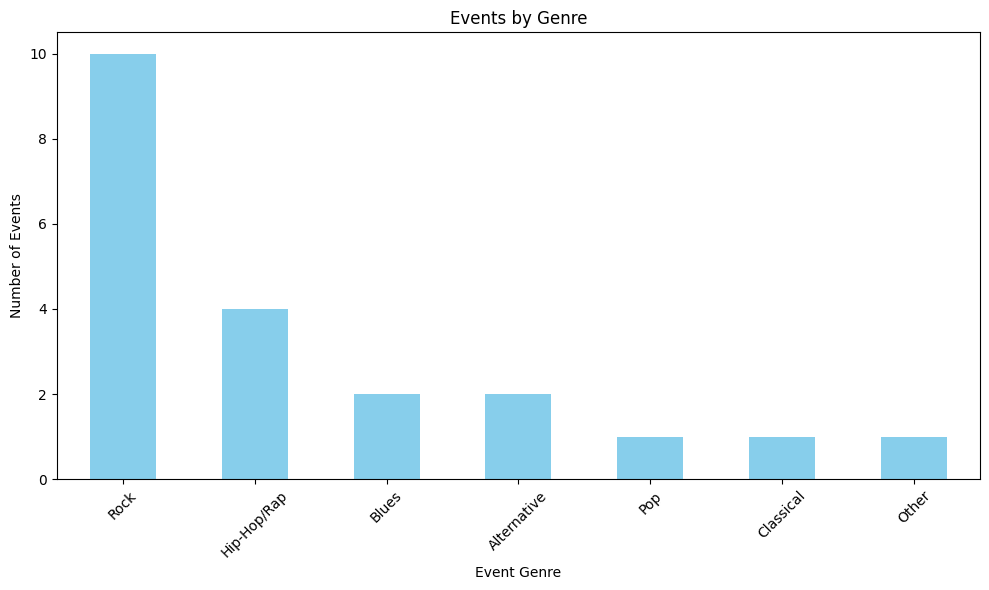

In [40]:
#Bar Graph event Genre Distribution

# Count the number of events per genre
df_final['Event Genre'] = df_final['Event Genre'].replace('Undefined', 'Other')
genre_counts = df_final['Event Genre'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Events by Genre')
plt.xlabel('Event Genre')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:


# Calculate average temperature, ignoring None values
average_temperature = df_final['Temperature'].mean()

# Determine the most common weather condition, excluding "No forecast available"
common_condition = df_final[df_final['Condition'] != "No forecast available"]['Condition'].mode()[0]

average_temperature, common_condition

(np.float64(14.344705882352942), 'clear sky')

In [42]:
# Calculate the average Time to Airport (ignoring NaN)
average_time_to_airport = df_final['Time to Airport (min)'].mean()

# Calculate the average Distance to Airport (ignoring NaN)
average_distance_to_airport = df_final['Distance to Airport (km)'].mean()

print(f"Average Time to Airport (min): {average_time_to_airport:.2f}")
print(f"Average Distance to Airport (km): {average_distance_to_airport:.2f}")


Average Time to Airport (min): 24.19
Average Distance to Airport (km): 18.92


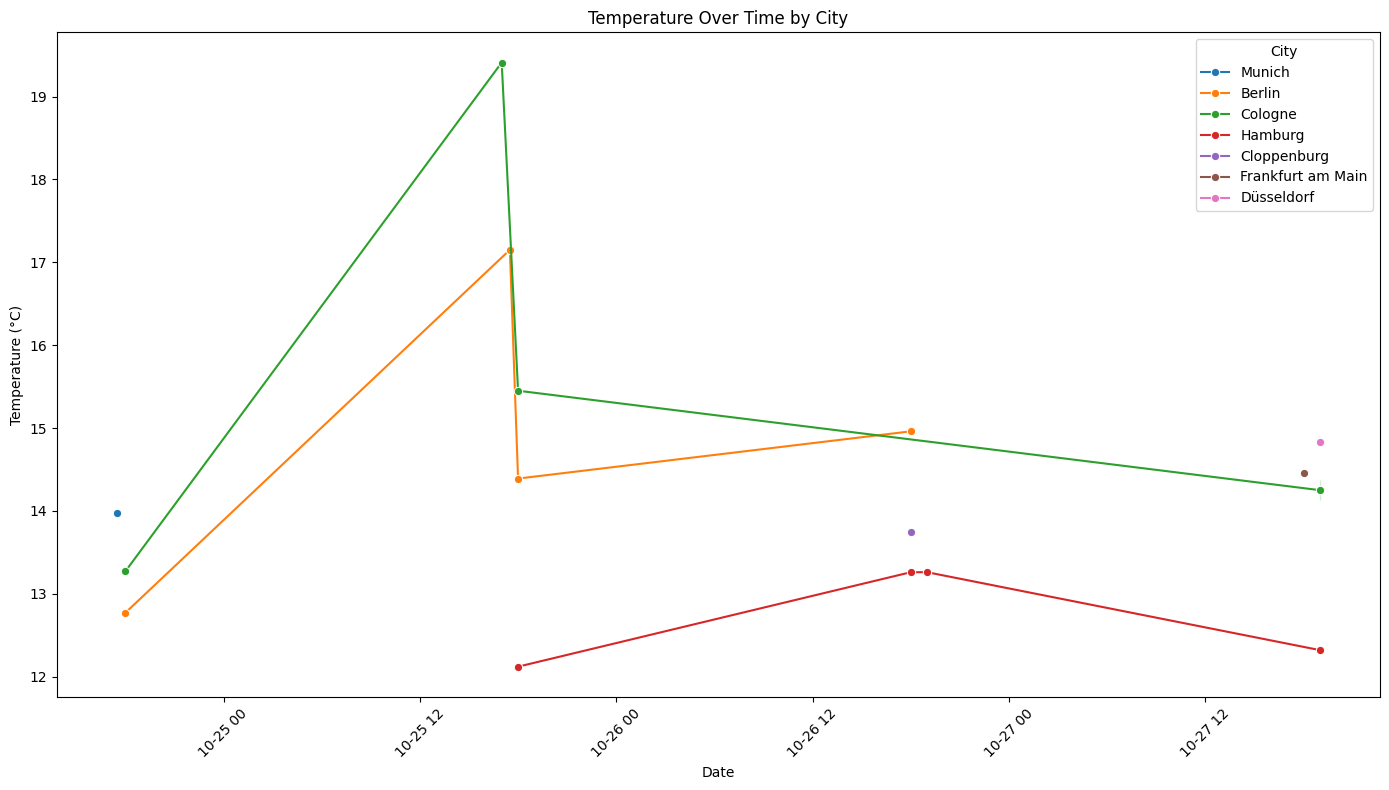

In [43]:
# Convert 'Event Date' to datetime if it's not already
df_final['Event Date'] = pd.to_datetime(df_final['Event Date'])


# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_final, x='Event Date', y='Temperature', hue='Venue City', marker='o')
plt.title('Temperature Over Time by City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

/var/folders/64/gjpr5_bx66b8k4qfzs080kn80000gn/T/ipykernel_13613/333751987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=events_per_city.index, y=events_per_city.values, palette='viridis')


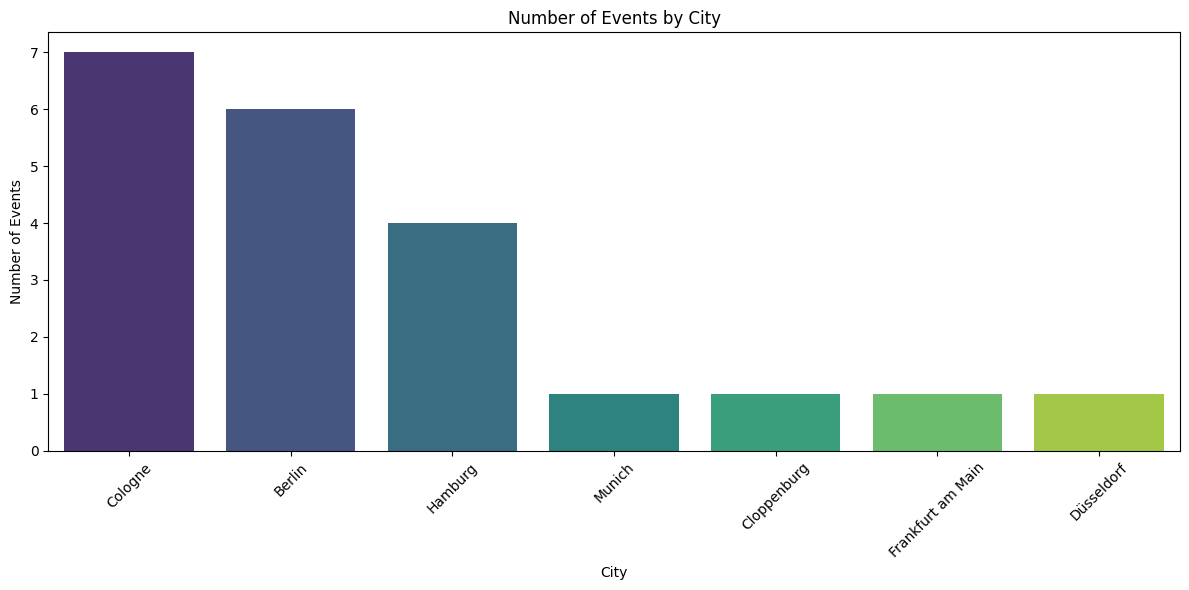

In [40]:
# Count the number of events per city
events_per_city = df_sorted_tmaster['Venue City'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=events_per_city.index, y=events_per_city.values, palette='viridis')
plt.title('Number of Events by City')
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

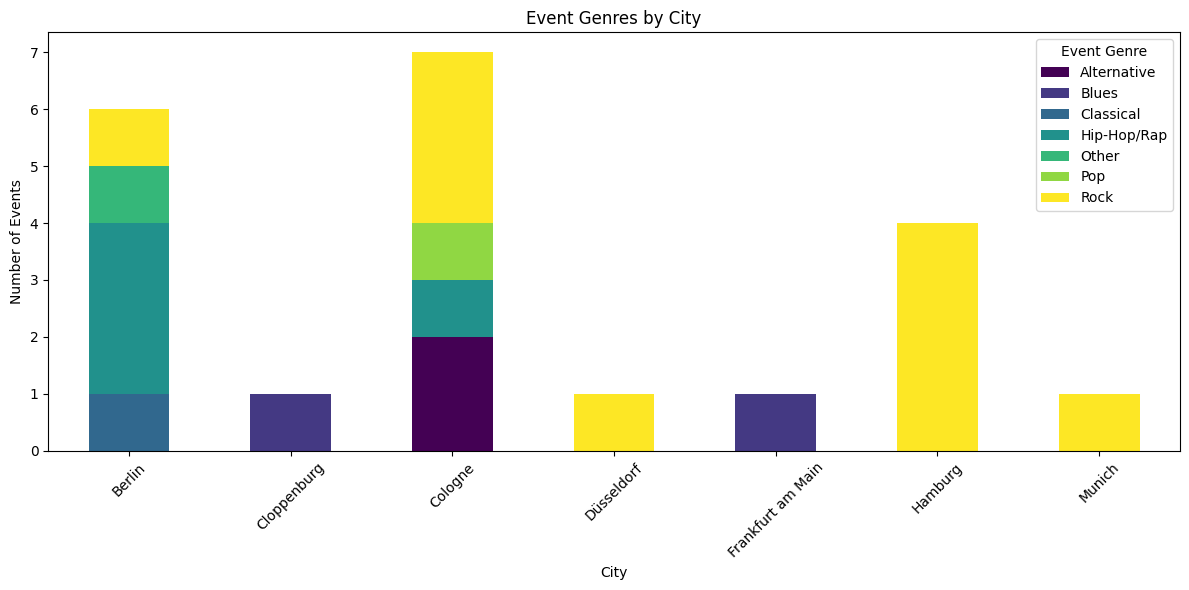

In [44]:

# Prepare data for stacked bar chart
genre_city = df_final.groupby(['Venue City', 'Event Genre']).size().unstack(fill_value=0)

# Plot
genre_city.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Event Genres by City')
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Event Genre')
plt.tight_layout()
plt.show()

/var/folders/64/gjpr5_bx66b8k4qfzs080kn80000gn/T/ipykernel_15549/365859068.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bubble_data, x='Venue City', y='Temperature', size='Event Count', sizes=(100, 1000), palette='coolwarm', legend=False, alpha=0.7)


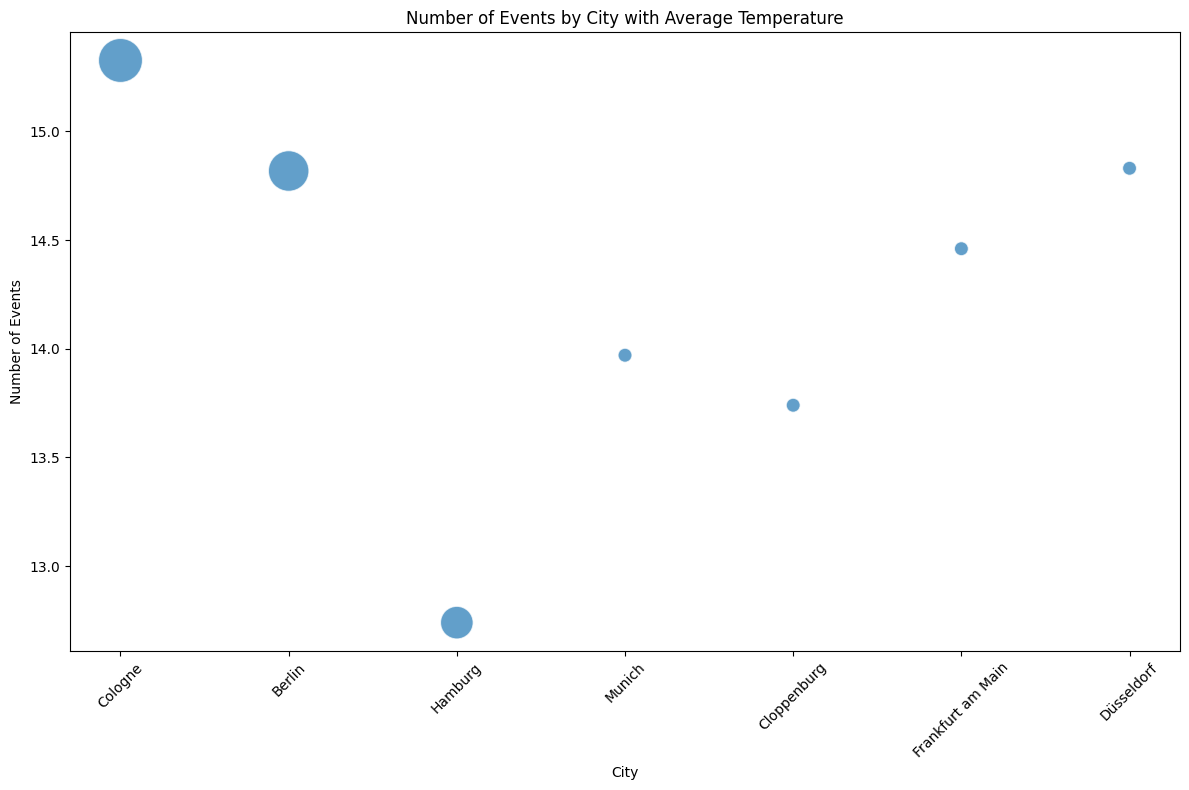

In [45]:
import seaborn as sns

# Count events per city
events_count = df_final['Venue City'].value_counts().reset_index()
events_count.columns = ['Venue City', 'Event Count']

# Merge with temperature data
avg_temp = df_final.groupby('Venue City')['Temperature'].mean().reset_index()
bubble_data = pd.merge(events_count, avg_temp, on='Venue City')

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='Venue City', y='Temperature', size='Event Count', sizes=(100, 1000), palette='coolwarm', legend=False, alpha=0.7)
plt.title('Number of Events by City with Average Temperature')
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!